# Pymaceuticals Inc.
---

### Trends, Observations, and Analysis of the mouse metadata and study results
In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens. Over the course of 45 days, tumor development was observed and measured. The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.


- Looking at the high level analysis provided by the bar and pie charts, it is clear that we have sufficient data for the drug of interest, Capomulin, with 230 out of 284 mice being given the treatment (the most mice out of the dataset). Additionally, we do have an almost even split of males (51%) and females (49%) in the dataset in an attempt to reduce any bias in our dataset.

- Analyzing the final tumor volume in mice per treatment proved to be highly informative. Filtering the data to analyze only the final timepoint of mice throughout treatment shows only the final results of each treatment, allowing  researchers to better determine the end-effectiveness of each drug. Analyzing the boxplots, it is clear that Capomulin and Ramicane are the most effective treatments out of the 4 drugs of interest, with Capomulin proving to be the most consistently effective treatment according to this study.

- The linear regression model provides insight on determining how much of an impact weight (independent variables) has on the tumor volume (dependent variable). A moderate positive correlation of 0.71 can be observed between Weight (g) and Average Tumor Volume (mm3) in mice on the Capomulin regimen.
 

In [566]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import linregress
import numpy as np

# Load in, read, and merge the 2 files for analysis
mouse_data_path = 'Resources/Mouse_metadata.csv'
study_data_path = 'Resources/Study_results.csv'

mouse_data = pd.read_csv(mouse_data_path)
study_data = pd.read_csv(study_data_path)

combined_mouse = pd.merge(mouse_data, study_data, how='inner', on='Mouse ID')

# Preview results
combined_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [567]:
# Check for number of mice in the dataset
number_of_mice = combined_mouse['Mouse ID'].nunique()
number_of_mice

249

In [568]:
# Get the duplicate mice by ID that shows up for Mouse ID and Timepoint
duplicated_mice = combined_mouse[combined_mouse.duplicated(['Mouse ID', 'Timepoint'])]
duplicated_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [569]:
# Creating clean df: Drop the duplicate mouse g989
clean_df = combined_mouse[combined_mouse['Mouse ID'] != 'g989']
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [570]:
# Check for the number of mice in the clean dataframe
# Should have one less mouse: Mouse g989
clean_df['Mouse ID'].nunique()

248

## Summary Statistics

In [571]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_df = clean_df.groupby('Drug Regimen')
tumor_mean = regimen_df['Tumor Volume (mm3)'].mean()
tumor_median = regimen_df['Tumor Volume (mm3)'].median()
tumor_var = regimen_df['Tumor Volume (mm3)'].var()
tumor_stdev = regimen_df['Tumor Volume (mm3)'].std()
tumor_sem = regimen_df['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
sumstats_df = pd.DataFrame({'Mean Tumor Volume': tumor_mean,
                            'Median Tumor Volume': tumor_median,
                            'Tumor Volume Variance': tumor_var,
                            'Tumor Std. Deviation': tumor_stdev,
                            'Tumor Std. Error': tumor_sem})

sumstats_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Std. Deviation,Tumor Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

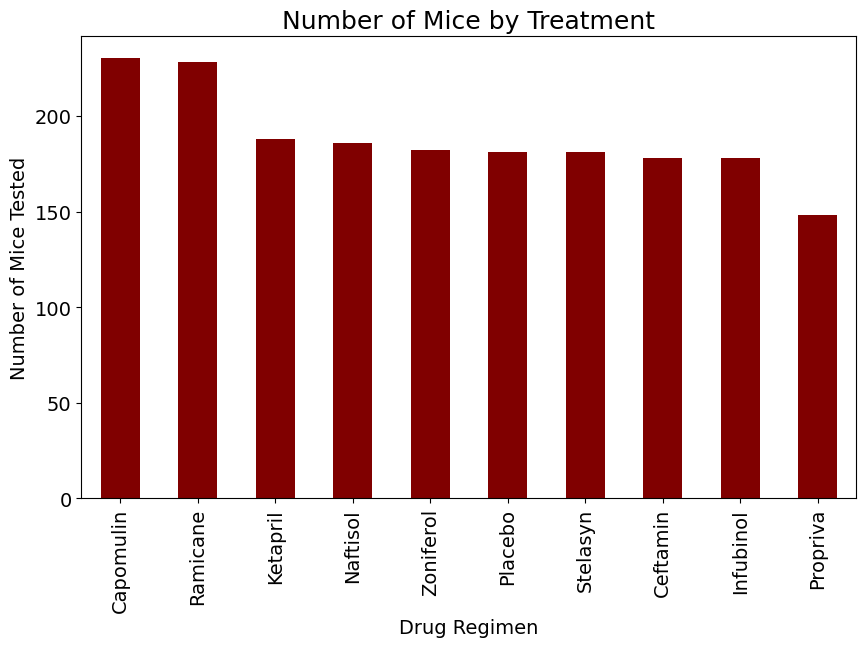

In [572]:
# Simple barchart using Pandas analyzing the count of Timepoints per treatment

# Group the clean df by Drug Regimen again and take the total count of mice by each regimen
total_timepoints = clean_df.groupby(['Drug Regimen']).count()['Timepoint']

# Create a DataFrame showing the count of each timepoint by drug regimen, in descending order
total_timepoints_df = pd.DataFrame(total_timepoints).sort_values(by='Timepoint', ascending=False)

# Make df into bar chart
total_timepoints_df.plot(figsize=(10,6), kind='bar', color='maroon', legend=False, fontsize=14)
plt.xlabel('Drug Regimen', fontsize= 14)
plt.ylabel('Number of Mice Tested', fontsize=14)
plt.title('Number of Mice by Treatment', fontsize=18)
plt.show()


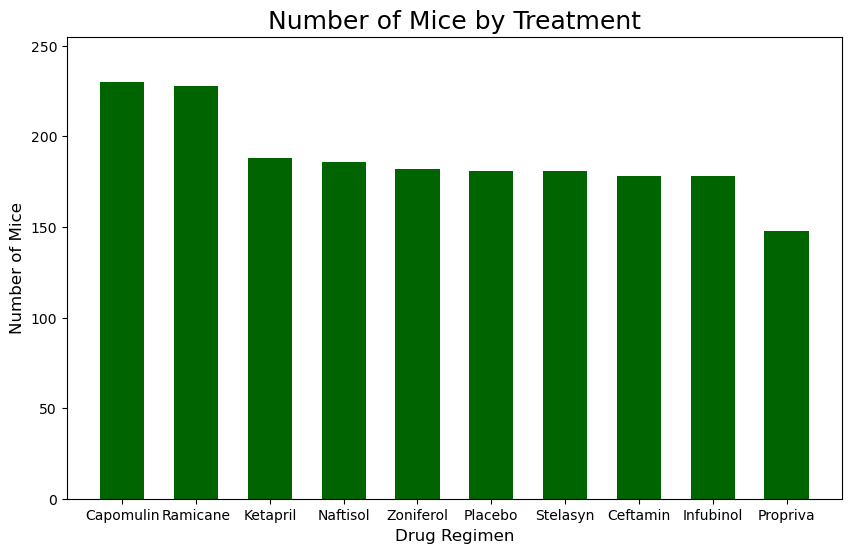

In [573]:
# Better looking barchart using PyPlot analyzing the number of Timeopints per Treatment

# Establish the figure and x-axis
fig1, ax1 = plt.subplots(figsize=(10,6))
x_axis = np.arange(len(total_timepoints_df))
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, total_timepoints_df.index)

# Create bar chart with df info
plt.bar(x_axis, total_timepoints_df['Timepoint'], 
        color='darkgreen',
        width= 0.6, 
        align='center')

# Create limits, labels, and titles
plt.title('Number of Mice by Treatment', fontsize=18)
plt.xlabel('Drug Regimen', fontsize=12)
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylabel('Number of Mice', fontsize=12)
plt.ylim(0, max(total_timepoints_df['Timepoint'])+25)

plt.show()

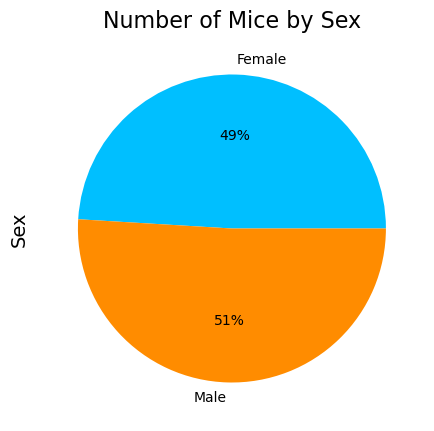

In [574]:
# Generate a pie chart showing the distribution of female versus male mice using pandas\

# Change colors
pie_colors = ['deepskyblue', 'darkorange']

# Plotting the pie chart for above dataframe
clean_df.groupby(['Sex']).count()['Mouse ID'].plot(kind='pie', y='Mouse_ID', autopct='%1.0f%%', 
                                                   colors=pie_colors, figsize=(5,5))
plt.title('Number of Mice by Sex', fontsize=16)
plt.ylabel('Sex', fontsize=14)
plt.show()

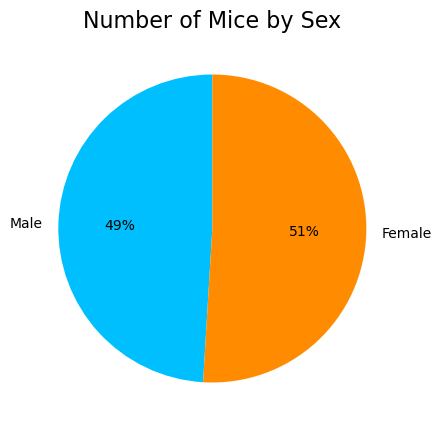

In [575]:
# Generate the same chart using Matplotlib

# Group df by sex and get the counts of mice by each sex
plt_gender_df = pd.DataFrame(clean_df.groupby('Sex').count()['Mouse ID'])

# Establish the figure
fig1, ax1 = plt.subplots(figsize=(5,5))

# Establish the labels and values
labels = ['Male', 'Female']
values= plt_gender_df['Mouse ID']
plt_colors= ['deepskyblue', 'darkorange']

plt.pie(values, labels=labels, colors=plt_colors, autopct='%1.0f%%', startangle=90)
plt.title('Number of Mice by Sex', fontsize=16)
plt.ylabel(None)
plt.show()



## Quartiles, Outliers and Boxplots

In [576]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby('Mouse ID')
last_timepoint_df = pd.DataFrame(last_timepoint['Timepoint'].max())

# Merge with the original DataFrame to get the tumor volume at the last timepoint (max volume)
tumor_vol_df = pd.merge(last_timepoint_df, clean_df, on=['Mouse ID', 'Timepoint'])
tumor_vol_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
243,z435,10,Propriva,Female,12,26,48.710661,0
244,z578,45,Ramicane,Male,11,16,30.638696,0
245,z581,45,Infubinol,Female,24,25,62.754451,3
246,z795,45,Naftisol,Female,13,29,65.741070,3


In [577]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
capomulin_tumvol = []
ramicane_tumvol = []
infubinol_tumvol = []
ceftamin_tumvol = []

for i in range (len(tumor_vol_df)):
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Capomulin':
        capomulin_tumvol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Ramicane':
        ramicane_tumvol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Infubinol':
        infubinol_tumvol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])
    if tumor_vol_df.loc[i, 'Drug Regimen'] == 'Ceftamin':
        ceftamin_tumvol.append(tumor_vol_df.loc[i, 'Tumor Volume (mm3)'])

In [578]:
# Capomulin IQR and potential outliers
cap_quartile1= np.quantile(capomulin_tumvol, 0.25)
cap_quartile2 = np.quantile(capomulin_tumvol, 0.5)
cap_quartile3= np.quantile(capomulin_tumvol, 0.75)
cap_iqr = cap_quartile3 - cap_quartile1

print(f"The lower quartile of Capomulin tumor volume is: {cap_quartile1}")
print(f"The upper quartile of Capomulin tumor volume is: {cap_quartile3}")
print(f"The interquartile range of Capomulin tumor volume is: {cap_iqr}")
print(f"The the median of Capomulin tumor volume is: {cap_quartile2} ")

cap_lower_bound = cap_quartile1 - (1.5*cap_iqr)
cap_upper_bound = cap_quartile3 + (1.5*cap_iqr)
print(f"Values below {cap_lower_bound} could be outliers.")
print(f"Values above {cap_upper_bound} could be outliers.")

print(" ")

# Ramicane IQR and potential outliers
ram_quartile1= np.quantile(ramicane_tumvol, 0.25)
ram_quartile2 = np.quantile(ramicane_tumvol, 0.5)
ram_quartile3= np.quantile(ramicane_tumvol, 0.75)
ram_iqr = ram_quartile3 - ram_quartile1

print(f"The lower quartile of Ramicane tumor volume is: {ram_quartile1}")
print(f"The upper quartile of Ramicane tumor volume is: {ram_quartile3}")
print(f"The interquartile range of Ramicane tumor volume is: {ram_iqr}")
print(f"The the median of Ramicane tumor volume is: {ram_quartile2} ")

ram_lower_bound = ram_quartile1 - (1.5*ram_iqr)
ram_upper_bound = ram_quartile3 + (1.5*ram_iqr)
print(f"Values below {ram_lower_bound} could be outliers.")
print(f"Values above {ram_upper_bound} could be outliers.")

print(" ")

# Infubinol IQR and potential outliers
inf_quartile1= np.quantile(infubinol_tumvol, 0.25)
inf_quartile2 = np.quantile(infubinol_tumvol, 0.5)
inf_quartile3= np.quantile(infubinol_tumvol, 0.75)
inf_iqr = inf_quartile3 - inf_quartile1

print(f"The lower quartile of Infubinol tumor volume is: {inf_quartile1}")
print(f"The upper quartile of Infubinol tumor volume is: {inf_quartile3}")
print(f"The interquartile range of Infubinol tumor volume is: {inf_iqr}")
print(f"The the median of Infubinol tumor volume is: {inf_quartile2} ")

inf_lower_bound = inf_quartile1 - (1.5*inf_iqr)
inf_upper_bound = inf_quartile3 + (1.5*inf_iqr)
print(f"Values below {inf_lower_bound} could be outliers.")
print(f"Values above {inf_upper_bound} could be outliers.")

print(" ")

# Ceftamin IQR and potential outliers
cef_quartile1= np.quantile(ceftamin_tumvol, 0.25)
cef_quartile2 = np.quantile(ceftamin_tumvol, 0.5)
cef_quartile3= np.quantile(ceftamin_tumvol, 0.75)
cef_iqr = cef_quartile3 - cef_quartile1

print(f"The lower quartile of Ceftamin tumor volume is: {cef_quartile1}")
print(f"The upper quartile of Ceftamin tumor volume is: {cef_quartile3}")
print(f"The interquartile range of Ceftamin tumor volume is: {cef_iqr}")
print(f"The the median of Ceftamin tumor volume is: {cef_quartile2} ")

cef_lower_bound = cef_quartile1 - (1.5*cef_iqr)
cef_upper_bound = cef_quartile3 + (1.5*cef_iqr)
print(f"Values below {cef_lower_bound} could be outliers.")
print(f"Values above {cef_upper_bound} could be outliers.")

The lower quartile of Capomulin tumor volume is: 32.37735684
The upper quartile of Capomulin tumor volume is: 40.1592203
The interquartile range of Capomulin tumor volume is: 7.781863460000004
The the median of Capomulin tumor volume is: 38.1251644 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
 
The lower quartile of Ramicane tumor volume is: 31.56046955
The upper quartile of Ramicane tumor volume is: 40.65900627
The interquartile range of Ramicane tumor volume is: 9.098536719999998
The the median of Ramicane tumor volume is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
 
The lower quartile of Infubinol tumor volume is: 54.04860769
The upper quartile of Infubinol tumor volume is: 65.52574285
The interquartile range of Infubinol tumor volume is: 11.477135160000003
The the median of Infubinol tumor volume is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values

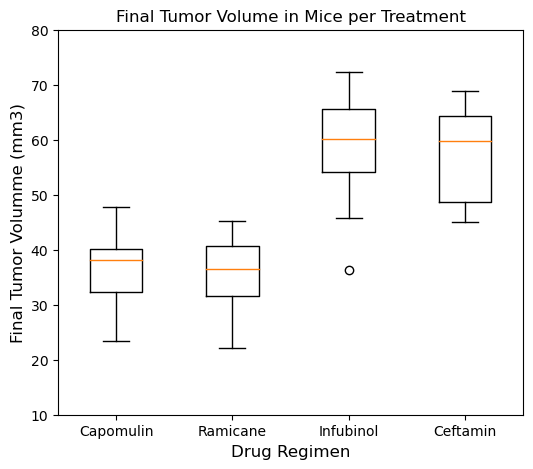

In [579]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_data = [capomulin_tumvol, ramicane_tumvol, infubinol_tumvol, ceftamin_tumvol]

fig1, ax1 = plt.subplots(figsize= (6,5))
ax1.boxplot(boxplot_data, labels=treatments)
plt.title('Final Tumor Volume in Mice per Treatment')
plt.xlabel('Drug Regimen', fontsize=12)
plt.ylabel('Final Tumor Volumme (mm3)', fontsize=12)
plt.ylim(10, 80)
plt.show()

## Line and Scatter Plots

In [580]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Generate new df and create mouse variable to make the plot dynamic
mouse_to_plot = 's185'

# New df that only shows one mouse based on the drug (capomulin)
cap_mouse_data = clean_df[(clean_df['Drug Regimen'] == 'Capomulin') & (clean_df['Mouse ID'] == mouse_to_plot)]
cap_mouse_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


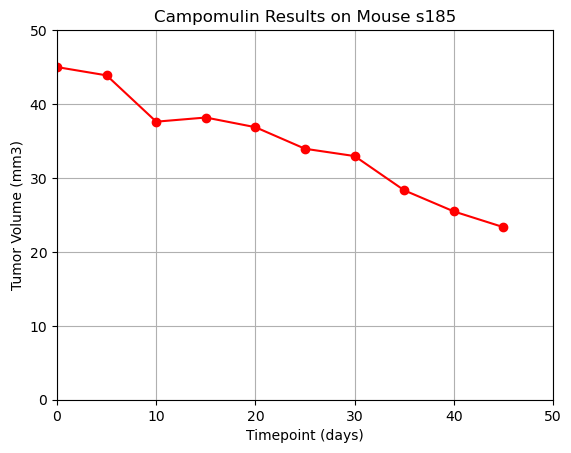

In [581]:
# Generate scatterplot
plt.plot(cap_mouse_data['Timepoint'], cap_mouse_data['Tumor Volume (mm3)'], color='red', marker='o')
plt.title(f'Campomulin Results on Mouse {mouse_to_plot}')
plt.xlabel('Timepoint (days)')
plt.xlim(0,50)
plt.ylabel('Tumor Volume (mm3)')
plt.ylim(00,50)
plt.grid()
plt.show()

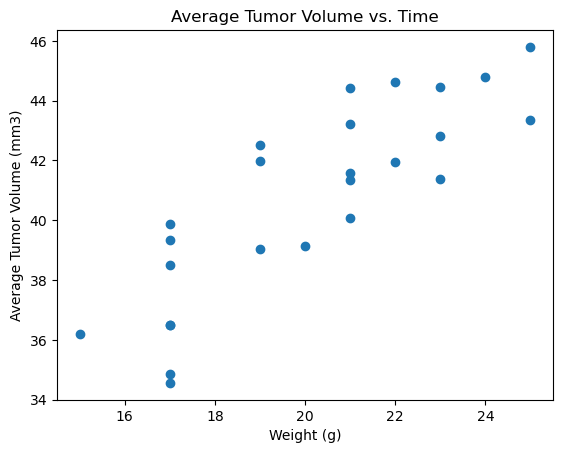

In [582]:
# Generate a scatter plot of average tumor volume vs. average mouse weight for the Capomulin regimen

# Access only Capomulin rows grouped by Mouse and take the mean
avg_tum_weight = clean_df.loc[clean_df['Drug Regimen'] == 'Capomulin', :].groupby('Mouse ID').mean()

x_values = avg_tum_weight['Weight (g)']
y_values = avg_tum_weight['Tumor Volume (mm3)']

# Scatterplot
plt.scatter(x_values, y_values)
plt.title('Average Tumor Volume vs. Time')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

The correlation between mouse weight and the average tumor volume is 0.71


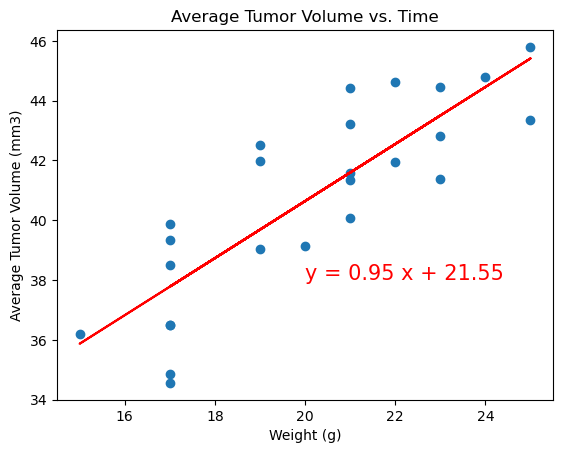

In [583]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Linear Regression model and calculating line equation
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f'y = {str(round(slope,2))} x + {str(round(intercept,2))}'

# Building plot
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.title('Average Tumor Volume vs. Weight')
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2, 2)}")
plt.show()